# **KASDD F1 Lap time - Biasa Aja**

# Import Dataset

In [596]:
# import library dan data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as scp
import scipy.cluster.hierarchy as shc
import datetime
import time

from decimal import Decimal
from numpy.polynomial.polynomial import polyfit
from sklearn.preprocessing import LabelEncoder, Normalizer, StandardScaler, MinMaxScaler
from sklearn.feature_selection import chi2, mutual_info_regression, mutual_info_classif, SelectKBest, mutual_info_regression, SelectPercentile, mutual_info_regression, f_classif
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, KFold
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import RepeatedStratifiedKFold


f1_data = pd.read_csv("f1_train.csv")
f1_data = f1_data.drop(axis=1, columns=["ID"])
f1_data

C:\Users\asus\AppData\Local\Temp\ipykernel_2584\3935116667.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Time,LapTime,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,...,Deleted,DeletedReason,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,0 days 02:26:25.496000,0 days 00:01:40.943000,6.0,0 days 02:25:08.325000,NaN,0 days 00:00:46.163000,0 days 00:00:28.979000,0 days 00:00:25.801000,0 days 02:25:36.926000,0 days 02:26:05.905000,...,False,NaN,17.1,68.0,1008.0,False,24.8,157,3.0,Participant
1,0 days 01:13:51.732000,0 days 00:01:48.067000,1.0,NaN,NaN,0 days 00:00:39.129000,0 days 00:00:43.601000,0 days 00:00:25.337000,0 days 01:12:42.794000,0 days 01:13:26.395000,...,False,NaN,25.0,49.0,1008.5,False,43.3,275,1.0,Podium
2,0 days 02:22:35.139000,0 days 00:01:22.881000,2.0,NaN,NaN,0 days 00:00:28.890000,0 days 00:00:18.554000,0 days 00:00:35.437000,0 days 02:21:41.150000,0 days 02:21:59.704000,...,False,NaN,17.6,57.0,1018.2,False,29.9,0,0.6,Participant
3,0 days 01:03:36.822000,0 days 00:01:31.585000,1.0,0 days 00:14:44.885000,NaN,NaN,0 days 00:00:28.929000,0 days 00:00:30.478000,NaN,0 days 01:03:06.412000,...,False,NaN,17.6,67.0,1007.7,False,29.5,135,1.8,Podium
4,0 days 01:45:40.072000,0 days 00:01:34.742000,2.0,NaN,NaN,0 days 00:00:34.895000,0 days 00:00:29.874000,0 days 00:00:29.973000,0 days 01:44:40.174000,0 days 01:45:10.048000,...,False,NaN,26.1,55.0,1011.0,False,31.0,271,1.3,Point
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,0 days 01:27:00.913000,0 days 00:01:25.235000,2.0,NaN,NaN,0 days 00:00:30.620000,0 days 00:00:30.668000,0 days 00:00:23.947000,0 days 01:26:06.294000,0 days 01:26:36.962000,...,False,NaN,29.3,32.0,988.4,False,49.9,252,1.2,Participant
18784,0 days 01:21:32.309000,0 days 00:01:40.363000,1.0,NaN,NaN,0 days 00:00:29.488000,0 days 00:00:42.838000,0 days 00:00:28.037000,0 days 01:20:21.469000,0 days 01:21:04.307000,...,False,NaN,30.0,72.0,1009.0,False,36.8,145,1.1,Participant
18785,0 days 02:00:31.678000,0 days 00:01:52.495000,3.0,NaN,NaN,0 days 00:00:32.659000,0 days 00:00:49.567000,0 days 00:00:30.269000,0 days 01:59:11.871000,0 days 02:00:01.438000,...,False,NaN,17.6,66.0,966.7,False,30.3,146,1.1,Participant
18786,0 days 01:07:59.947000,0 days 00:01:25.938000,1.0,NaN,NaN,0 days 00:00:30.564000,0 days 00:00:31.370000,0 days 00:00:24.004000,0 days 01:07:04.556000,0 days 01:07:35.926000,...,False,NaN,28.8,33.0,988.5,False,50.1,134,1.5,Participant


In [597]:
f1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   PitOutTime          1039 non-null   object 
 4   PitInTime           735 non-null    object 
 5   Sector1Time         18381 non-null  object 
 6   Sector2Time         18749 non-null  object 
 7   Sector3Time         18696 non-null  object 
 8   Sector1SessionTime  18344 non-null  object 
 9   Sector2SessionTime  18749 non-null  object 
 10  Sector3SessionTime  18696 non-null  object 
 11  SpeedI1             15871 non-null  float64
 12  SpeedI2             18749 non-null  float64
 13  SpeedFL             18013 non-null  float64
 14  SpeedST             17096 non-null  float64
 15  IsPersonalBest      18758 non-null  object 
 16  Comp

# Preprocessing

In [598]:
def cek_duplicates(df):
    if df.duplicated().sum() > 0:
        print("Terdapat", df.duplicated().sum(), "pasang data yang redundan")
        display(df[df.duplicated()])
    else:
        print("Tidak ada data yang redundan")

def cek_null(df):
    col_na = df.isnull().sum().sort_values(ascending=True)
    percent = col_na*100 / len(df)

    missing_data = pd.concat([col_na, percent], axis=1, keys=['Total', 'Percent'])

    if (missing_data[missing_data['Total'] > 0].shape[0] == 0):
        print("Tidak ditemukan missing value pada dataset")

    else:
        print(missing_data[missing_data['Total'] > 0])

def cek_outlier(df):
    df_numerical = df.select_dtypes(include=['float64', 'int64']) 
    Q1 = df_numerical.quantile(0.25, numeric_only=True)
    Q3 = df_numerical.quantile(0.75, numeric_only=True)

    # Menghitung RUB dan RLB.
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR

    # Menampilkan banyaknya outlier pada atribut.
    outliers = (df_numerical < lower_limit) | (df_numerical > upper_limit)

    # Menghitung dan menampilkan persentase outlier pada tiap atribut.
    percentage_outliers = (outliers.sum() / len(df)) * 100
    print("Persentase Outlier pada tiap atribut:")
    print(percentage_outliers)

### Handling Missing Value

In [599]:
cek_null(f1_data)

                    Total    Percent
IsPersonalBest         30   0.159676
SpeedI2                39   0.207579
Sector2SessionTime     39   0.207579
Sector2Time            39   0.207579
Sector3SessionTime     92   0.489674
Sector3Time            92   0.489674
LapTime               290   1.543538
Sector1Time           407   2.166276
Sector1SessionTime    444   2.363211
SpeedFL               775   4.124973
SpeedST              1692   9.005748
SpeedI1              2917  15.525868
PitOutTime          17749  94.469874
PitInTime           18053  96.087928
DeletedReason       18477  98.344688


> Atribut `PitOutTime`, `PitInTime`, dan `DeletedReason` memiliki persentase jumlah missing value mencapai lebih dari 90%. Oleh karena itu, atribut-atribut tersebut perlu di drop.

In [600]:
f1_data = f1_data.drop(axis=1, columns=['PitOutTime', 'PitInTime', 'DeletedReason'])

In [601]:
def show_data_type_and_distribution(df):
    print("Menampilkan informasi dataset dan tipe data")
    print('#'*50)
    df.info()
    print('#'*50)
    print("Menampilkan distribusi data numerik")
    numerics = ['SpeedI2', 'SpeedFL', 'SpeedST', 'SpeedI1']
    for col in numerics:
        df_feature = f1_data[col]
        plt.figure(figsize=(10,5))
        plt.title(f'Distribusi data {col}')
        sns.kdeplot(df_feature, fill=True)
        plt.show()
    print("Menampilkan Modus dari data kategorikal")
    categoricals = ["IsPersonalBest", "Sector2SessionTime", "Sector2Time","Sector3SessionTime", "Sector3Time", "LapTime", "Sector1Time", "Sector1SessionTime"]
    for col in categoricals:
        print(f"Mode for {col} = {f1_data[col].mode()[0]}")

Menampilkan informasi dataset dan tipe data
##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18788 entries, 0 to 18787
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time                18788 non-null  object 
 1   LapTime             18498 non-null  object 
 2   Stint               18788 non-null  float64
 3   Sector1Time         18381 non-null  object 
 4   Sector2Time         18749 non-null  object 
 5   Sector3Time         18696 non-null  object 
 6   Sector1SessionTime  18344 non-null  object 
 7   Sector2SessionTime  18749 non-null  object 
 8   Sector3SessionTime  18696 non-null  object 
 9   SpeedI1             15871 non-null  float64
 10  SpeedI2             18749 non-null  float64
 11  SpeedFL             18013 non-null  float64
 12  SpeedST             17096 non-null  float64
 13  IsPersonalBest      18758 non-null  object 
 14  Compoun

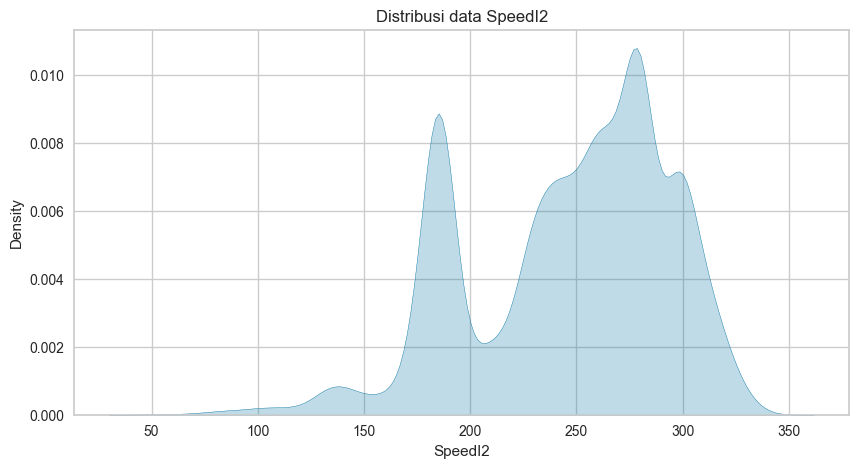

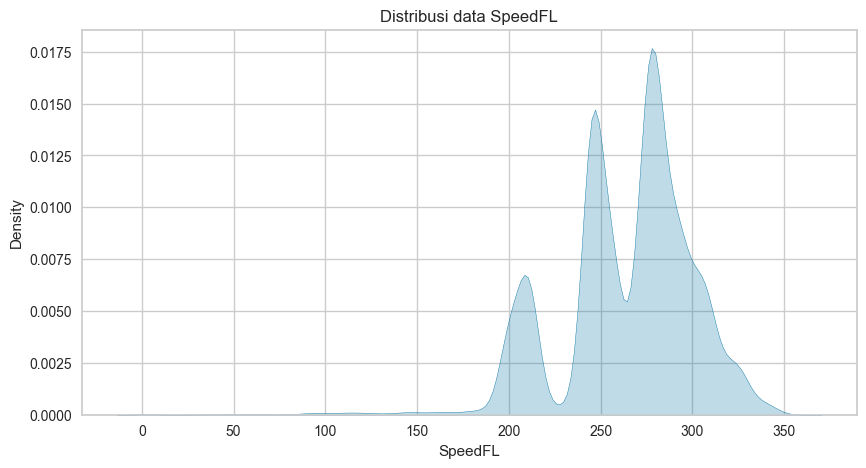

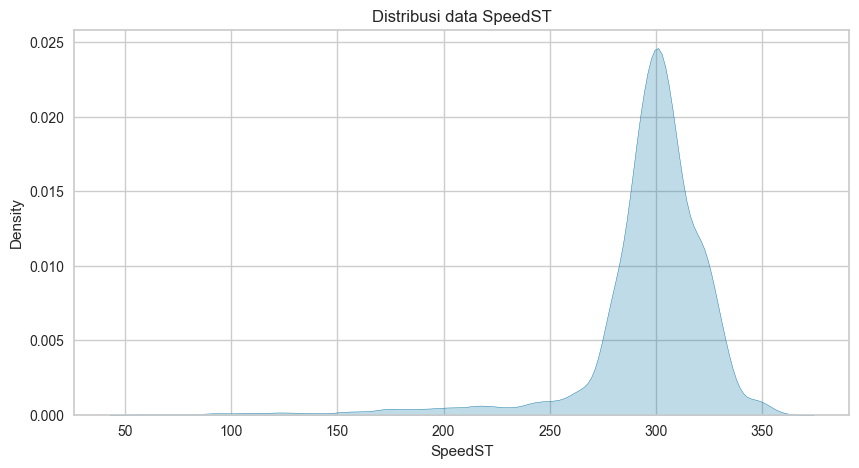

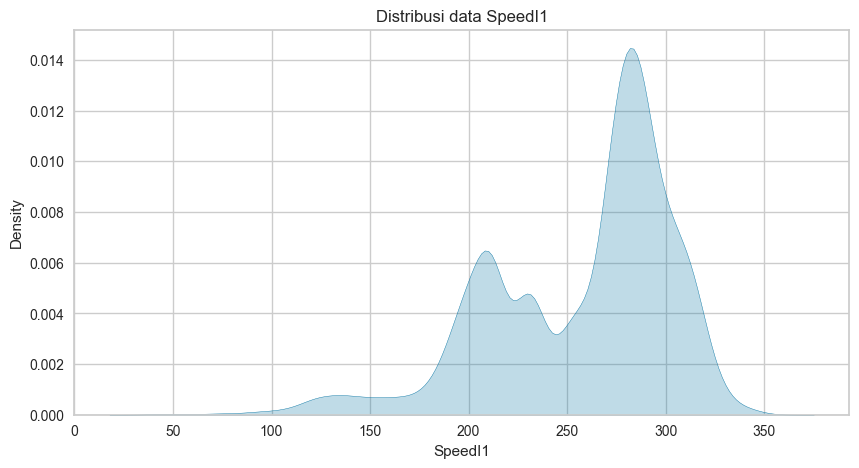

Menampilkan Modus dari data kategorikal
Mode for IsPersonalBest = False
Mode for Sector2SessionTime = 0 days 01:03:29.878000
Mode for Sector2Time = 0 days 00:00:29.905000
Mode for Sector3SessionTime = 0 days 01:06:09.122000
Mode for Sector3Time = 0 days 00:00:25.692000
Mode for LapTime = 0 days 00:01:16.993000
Mode for Sector1Time = 0 days 00:00:28.315000
Mode for Sector1SessionTime = 0 days 01:04:58.279000


In [602]:
show_data_type_and_distribution(f1_data)

In [603]:
def fill_null_mean(df):
    mean = df.mean()
    filled_df = df.fillna(mean)
    return filled_df
def fill_null_median(df):
    median = df.median()
    filled_df = df.fillna(median)
    return filled_df
def fill_null_mode(df):
    mode = df.mode()[0]
    filled_df = df.fillna(mode)
    return filled_df

In [604]:
f1_data['SpeedI2'] = fill_null_median(f1_data['SpeedI2'])
f1_data['SpeedFL'] = fill_null_median(f1_data['SpeedFL'])
f1_data['SpeedST'] = fill_null_mean(f1_data['SpeedST'])
f1_data['SpeedI1'] = fill_null_median(f1_data['SpeedI1'])
f1_data['IsPersonalBest'] = fill_null_mode(f1_data['IsPersonalBest'])
f1_data['Sector2SessionTime'] = fill_null_mode(f1_data['Sector2SessionTime'])
f1_data['Sector2Time'] = fill_null_mode(f1_data['Sector2Time'])
f1_data['Sector3SessionTime'] = fill_null_mode(f1_data['Sector3SessionTime'])
f1_data['Sector3Time'] = fill_null_mode(f1_data['Sector3Time'])
f1_data['LapTime'] = fill_null_mode(f1_data['LapTime'])
f1_data['Sector1Time'] = fill_null_mode(f1_data['Sector1Time'])
f1_data['Sector1SessionTime'] = fill_null_mode(f1_data['Sector1SessionTime'])

C:\Users\Rizky Prawira N\AppData\Local\Temp\ipykernel_24224\129334964.py:11: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  filled_df = df.fillna(mode)


In [605]:
cek_null(f1_data)

Tidak ditemukan missing value pada dataset


### Handling Duplicate Value

In [606]:
print("Jumlah duplikasi data : " + str(f1_data.duplicated().sum()))

Jumlah duplikasi data : 1


In [607]:
f1_data = f1_data.drop_duplicates()

### Handling Outliers

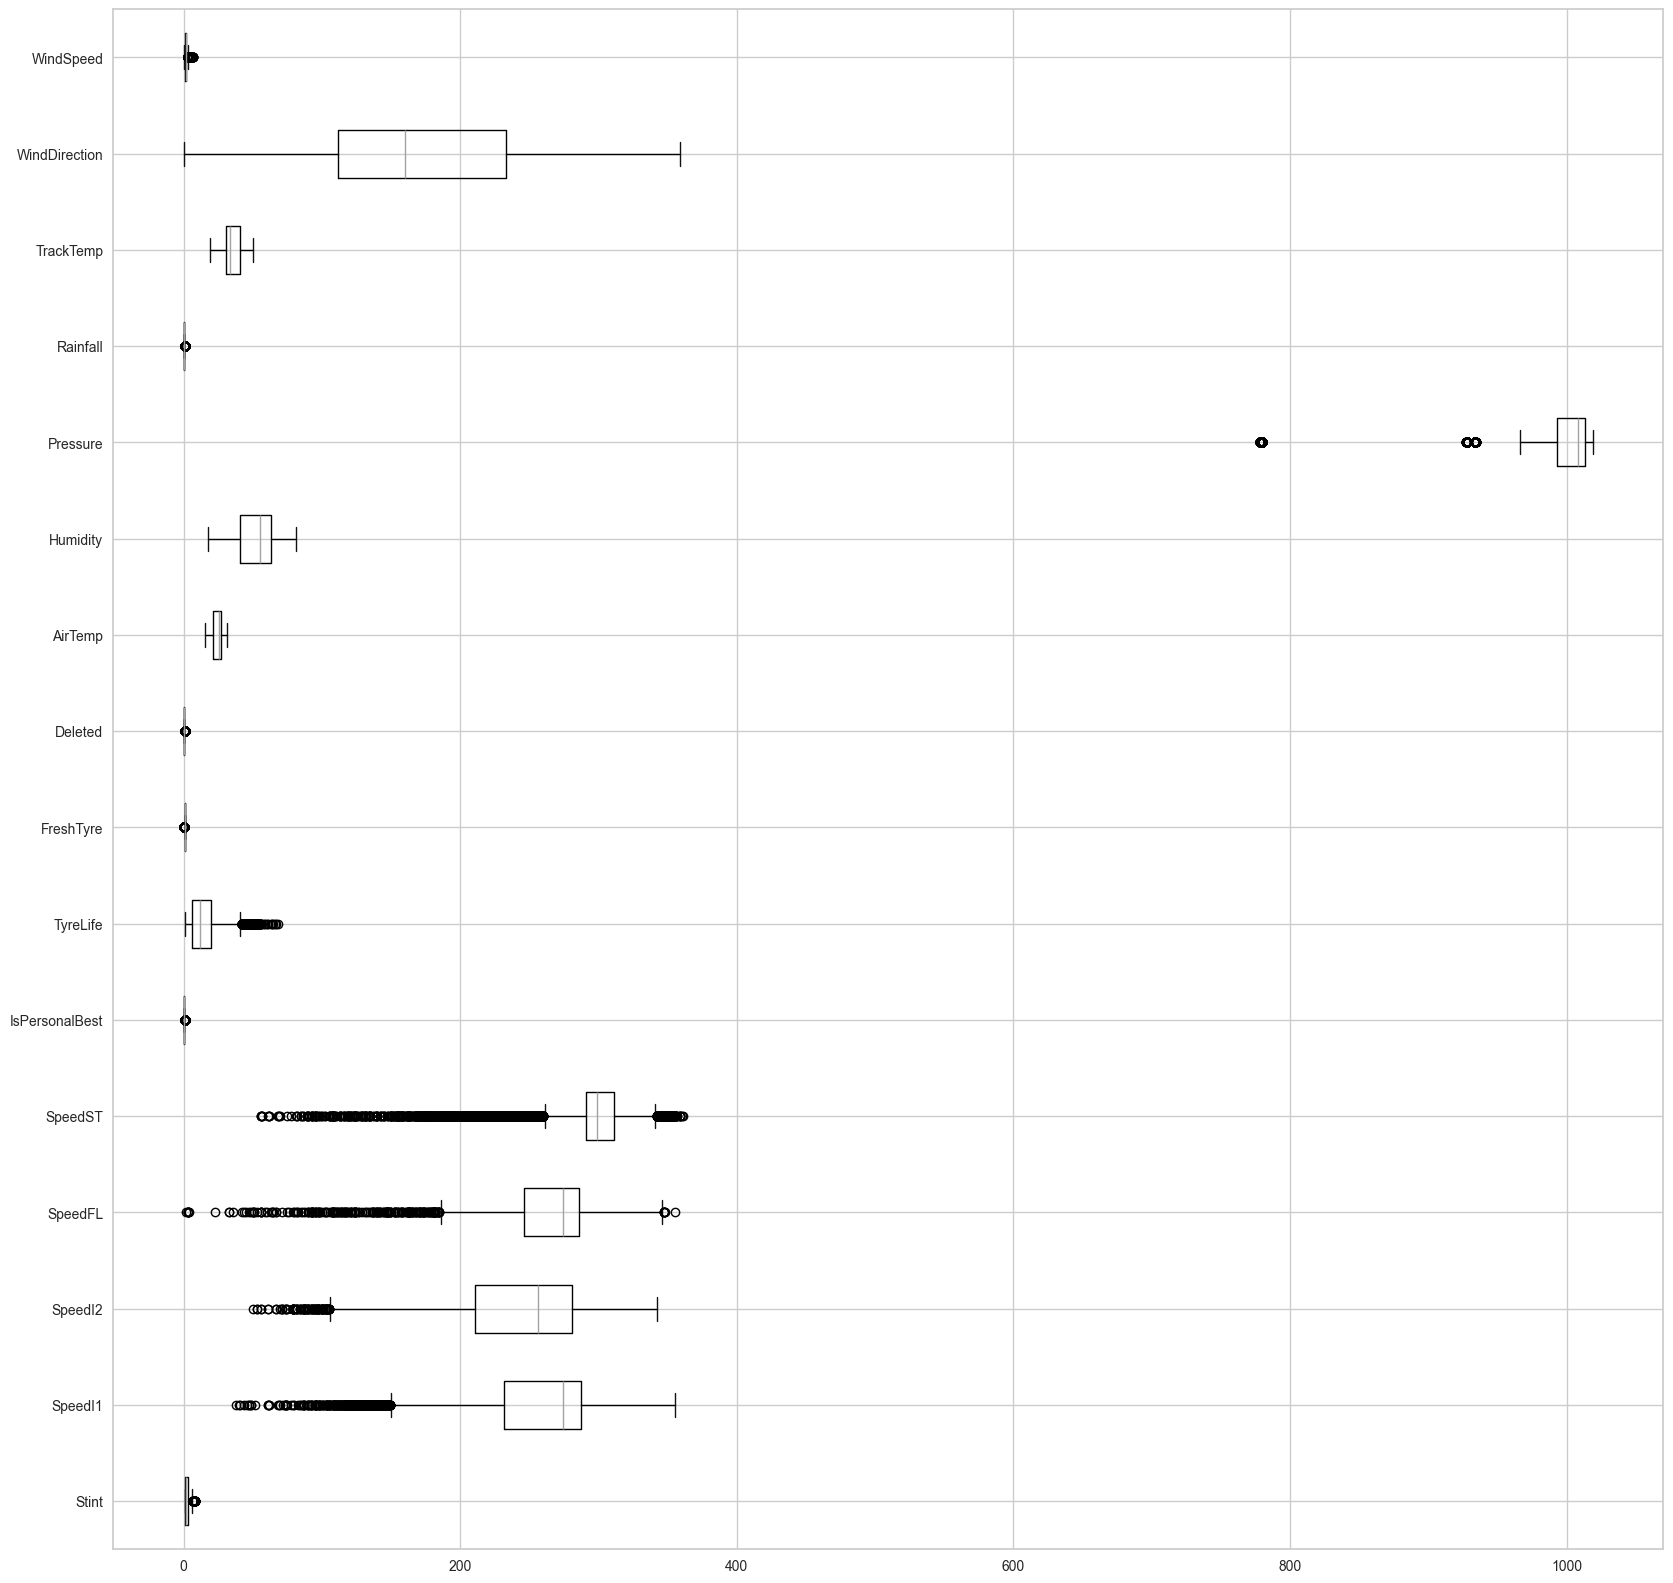

In [608]:
f1_data.boxplot(vert=False,figsize=(20,20))
plt.show()

In [609]:
laptime_numerical = f1_data.select_dtypes(include=['float64', 'int64']) 
Q1 = laptime_numerical.quantile(0.25)
Q3 = laptime_numerical.quantile(0.75)
IQR = Q3 - Q1

In [610]:
print(cek_outlier(f1_data))

Persentase Outlier pada tiap atribut:
Stint             0.298078
SpeedI1           2.746580
SpeedI2           0.548251
SpeedFL           1.320062
SpeedST           7.260340
TyreLife          1.948156
AirTemp           0.000000
Humidity          0.000000
Pressure         15.824772
TrackTemp         0.000000
WindDirection     0.000000
WindSpeed         8.026827
dtype: float64
None


> Atribut `Presure` digunakan untuk memprediksi `TyreLife`, sehingga tidak kami drop .

### Encoding Categorical Attributes

In [611]:
print("Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal")
print('#'*70)
print()
for col in f1_data.select_dtypes(include=object).columns:
    print(col, f": {len(f1_data[col].unique())}", f1_data[col].unique())
    print("\n")

Menampilkan nilai unique yang terdapat pada setiap kolom kategorikal
######################################################################

Time : 18744 ['0 days 02:26:25.496000' '0 days 01:13:51.732000'
 '0 days 02:22:35.139000' ... '0 days 02:00:31.678000'
 '0 days 01:07:59.947000' '0 days 02:04:03.127000']


LapTime : 14761 ['0 days 00:01:40.943000' '0 days 00:01:48.067000'
 '0 days 00:01:22.881000' ... '0 days 00:01:25.235000'
 '0 days 00:01:52.495000' '0 days 00:02:25.892000']


Sector1Time : 11540 ['0 days 00:00:46.163000' '0 days 00:00:39.129000'
 '0 days 00:00:28.890000' ... '0 days 00:01:06.782000'
 '0 days 00:00:30.620000' '0 days 00:00:52.231000']


Sector2Time : 12067 ['0 days 00:00:28.979000' '0 days 00:00:43.601000'
 '0 days 00:00:18.554000' ... '0 days 00:01:09.507000'
 '0 days 00:00:49.567000' '0 days 00:00:53.937000']


Sector3Time : 10711 ['0 days 00:00:25.801000' '0 days 00:00:25.337000'
 '0 days 00:00:35.437000' ... '0 days 00:00:21.484000'
 '0 days 00:00:28.037000

In [612]:
f1_data['Compound'] = f1_data['Compound'].map({'INTERMEDIATE':1, 'MEDIUM':4, 'HARD':2, 'SOFT':3, 'WET':0})
f1_data['Pos_cat'] = f1_data['Pos_cat'].map({'Participant':0, 'Podium':2, 'Point':1})

In [613]:
def zero_days_remover (duration):
    return duration.replace('0 days ', '')

In [614]:
time_att = []
for col in f1_data.select_dtypes(include=object).columns:
    time_att.append(col)

In [615]:
time_att

['Time',
 'LapTime',
 'Sector1Time',
 'Sector2Time',
 'Sector3Time',
 'Sector1SessionTime',
 'Sector2SessionTime',
 'Sector3SessionTime',
 'LapStartTime']

In [616]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(zero_days_remover)

Untuk memudahkan encoding waktu, kami menghilangkan 0 days karena seluruh data memiliki 0 days dan hal tersebut tidak membantu kami dalam melakukan encoding waktu

In [617]:
def time_converter (time_str):
    if '.' in time_str:
        time_str, milliseconds = time_str.split('.')
        milliseconds = int(milliseconds)
    else:
        milliseconds = 0

    x_time = datetime.datetime.strptime(time_str, '%H:%M:%S')

    total_seconds = datetime.timedelta(
        hours=x_time.hour,
        minutes=x_time.minute,
        seconds=x_time.second,
        microseconds=milliseconds / 1000  # Convert milliseconds to microseconds
    ).total_seconds()
    
    return total_seconds

In [618]:
for time in time_att:
    f1_data[time] = f1_data[time].apply(time_converter)

In [619]:
f1_data

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,LapStartTime,Deleted,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,8785.000496,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,8684.000553,False,17.1,68.0,1008.0,False,24.8,157,3.0,0
1,4431.000732,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,4323.000665,False,25.0,49.0,1008.5,False,43.3,275,1.0,2
2,8555.000139,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,8472.000258,False,17.6,57.0,1018.2,False,29.9,0,0.6,0
3,3816.000822,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,3724.000960,False,17.6,67.0,1007.7,False,29.5,135,1.8,2
4,6340.000072,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,6245.000330,False,26.1,55.0,1011.0,False,31.0,271,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,5220.000913,85.000235,2.0,30.000620,30.000668,23.000947,5166.000294,5196.000962,5220.000909,276.0,...,5135.000678,False,29.3,32.0,988.4,False,49.9,252,1.2,0
18784,4892.000309,100.000363,1.0,29.000488,42.000838,28.000037,4821.000469,4864.000307,4892.000344,297.0,...,4791.000946,False,30.0,72.0,1009.0,False,36.8,145,1.1,0
18785,7231.000678,112.000495,3.0,32.000659,49.000567,30.000269,7151.000871,7201.000438,7231.000707,309.0,...,7119.000183,False,17.6,66.0,966.7,False,30.3,146,1.1,0
18786,4079.000947,85.000938,1.0,30.000564,31.000370,24.000004,4024.000556,4055.000926,4079.000930,256.0,...,3994.000009,False,28.8,33.0,988.5,False,50.1,134,1.5,0


In [620]:
def convert_time_period(seconds):
    if 0 <= seconds < 6 * 3600:
        return 3   # From 00:00 to 05:59
    elif 6 * 3600 <= seconds < 12 * 3600:
        return 0  # From 06:00 to 11:59
    elif 12 * 3600 <= seconds < 17 * 3600:
        return 1  # From 12:00 to 16:59
    elif 17 * 3600 <= seconds < 21 * 3600:
        return 2  # From 17:00 to 20:59
    else:
        return 3  # From 21:00 to 23:59

In [621]:
f1_data['Time'] = f1_data['Time'].apply(convert_time_period)
f1_data['LapStartTime'] = f1_data['LapStartTime'].apply(convert_time_period)

f1_data

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,LapStartTime,Deleted,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,3,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,3,False,17.1,68.0,1008.0,False,24.8,157,3.0,0
1,3,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,3,False,25.0,49.0,1008.5,False,43.3,275,1.0,2
2,3,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,3,False,17.6,57.0,1018.2,False,29.9,0,0.6,0
3,3,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,3,False,17.6,67.0,1007.7,False,29.5,135,1.8,2
4,3,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,3,False,26.1,55.0,1011.0,False,31.0,271,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,3,85.000235,2.0,30.000620,30.000668,23.000947,5166.000294,5196.000962,5220.000909,276.0,...,3,False,29.3,32.0,988.4,False,49.9,252,1.2,0
18784,3,100.000363,1.0,29.000488,42.000838,28.000037,4821.000469,4864.000307,4892.000344,297.0,...,3,False,30.0,72.0,1009.0,False,36.8,145,1.1,0
18785,3,112.000495,3.0,32.000659,49.000567,30.000269,7151.000871,7201.000438,7231.000707,309.0,...,3,False,17.6,66.0,966.7,False,30.3,146,1.1,0
18786,3,85.000938,1.0,30.000564,31.000370,24.000004,4024.000556,4055.000926,4079.000930,256.0,...,3,False,28.8,33.0,988.5,False,50.1,134,1.5,0


# **EKSPLORASI** 

Apakah penggunaan ‘Compound’ yang berbeda berpengaruh terhadap performa? 


>Performa dari suatu mobil F1 dapat ditentukan melalui waktu yang ditempuh mobil tersebut selama satu lap, yaitu atribut `LapTime`. Atribut ini juga kami pilih sebagai representasi performa yang dianalisis pengaruhnya oleh `Compound` karena dalam balapan F1, tipe compound yang berbeda tidak mungkin dipakai dalam satu lap yang sama. Oleh karena itu pada eksplorasi ini kami hanya mengambil atribut `Compound` dan `LapTime`

In [622]:
compount_influence = f1_data.copy()

In [623]:
compount_influence = compount_influence[['Compound', 'LapTime']]
compount_influence

,Compound,LapTime
0,1,100.000943
1,4,108.000067
2,2,82.000881
3,3,91.000585
4,2,94.000742
...,...,...
18783,2,85.000235
18784,4,100.000363
18785,3,112.000495
18786,2,85.000938


In [624]:
compount_influence['Compound'] = compount_influence['Compound'].map({1: 'INTERMEDIATE', 4: 'MEDIUM', 2: 'HARD', 3: 'SOFT', 0: 'WET'})
compount_influence

,Compound,LapTime
0,INTERMEDIATE,100.000943
1,MEDIUM,108.000067
2,HARD,82.000881
3,SOFT,91.000585
4,HARD,94.000742
...,...,...
18783,HARD,85.000235
18784,MEDIUM,100.000363
18785,SOFT,112.000495
18786,HARD,85.000938


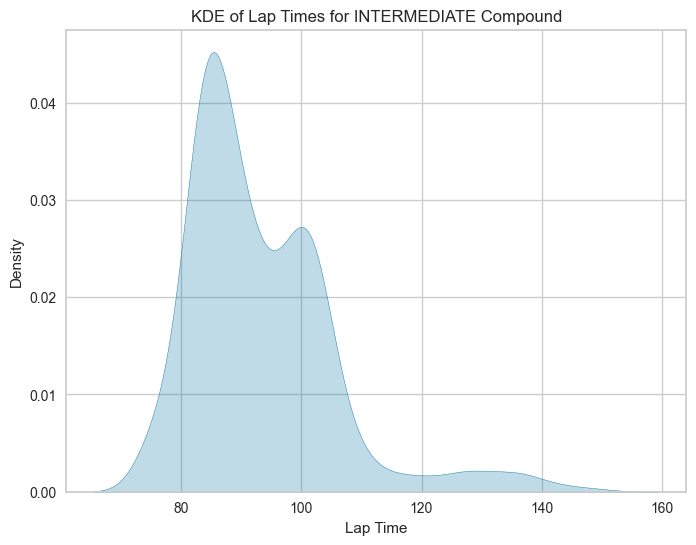

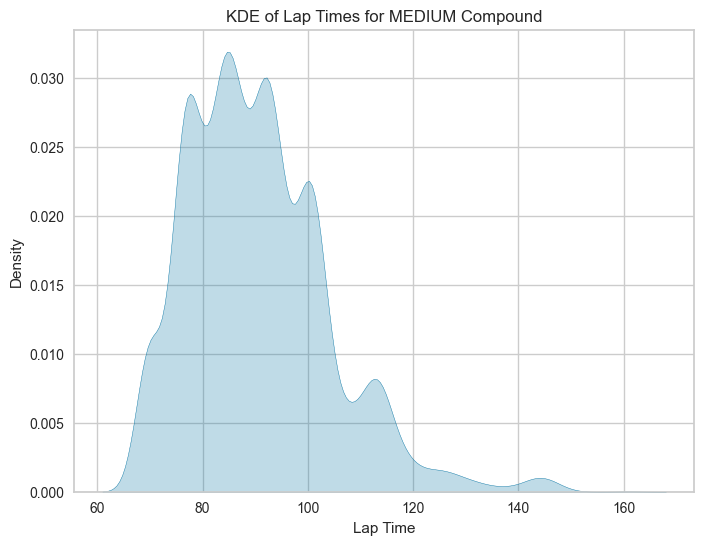

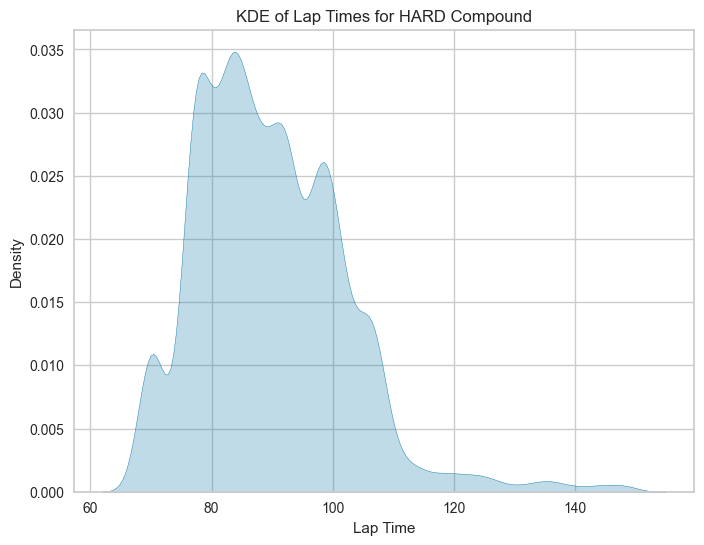

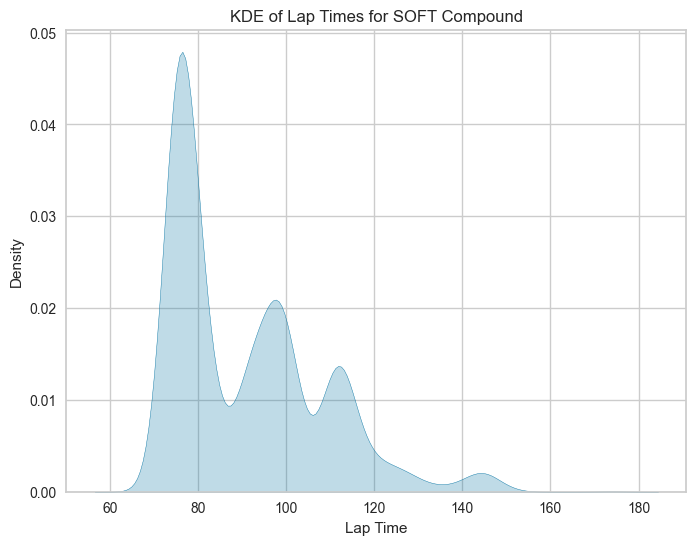

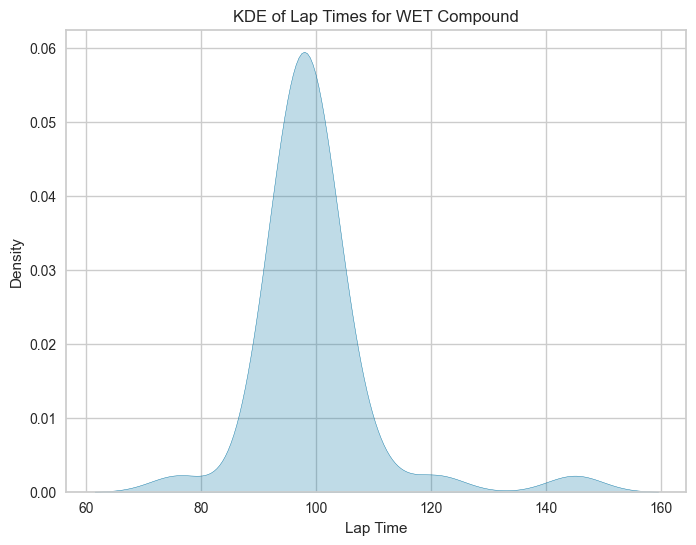

In [625]:
compounds = compount_influence['Compound'].unique()
for compound in compounds:
    plt.figure(figsize=(8, 6))
    subset = compount_influence[compount_influence['Compound'] == compound]['LapTime']
    sns.kdeplot(subset, fill=True)
    plt.title(f'KDE of Lap Times for {compound} Compound')
    plt.xlabel('Lap Time')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()

>Berdasarkan KDE plot untuk masing-masing tipe `Compound` terhadap `LapTime`, dapat diketahui bahwa semua tipe `Coumpound` memiliki distribusi positive-skewed. Dengan begitu, central tendency yang dapat digunakan dalam melakukan analisis perbandingan `Compound` terhadap performa mobil F1 berdasarkan `LapTime` adalah **median**.

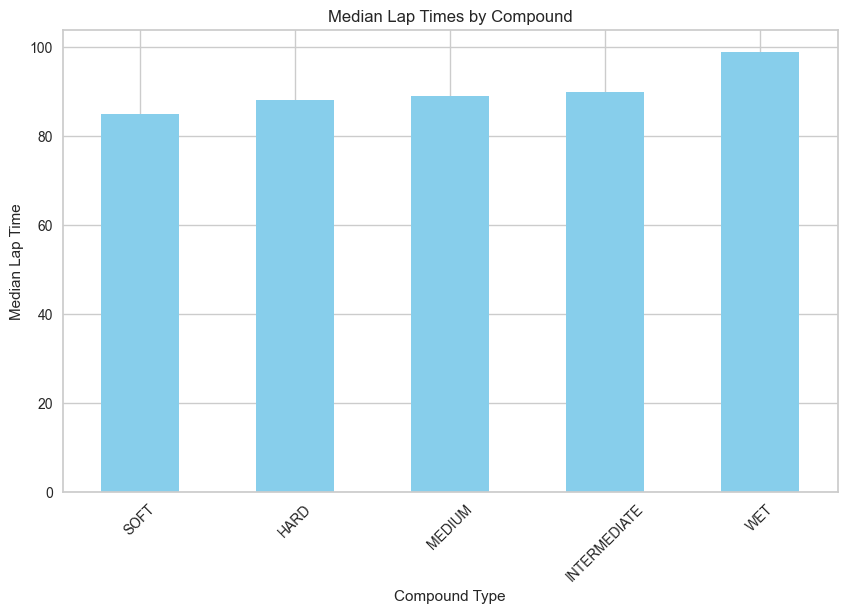

In [626]:
median_laptimes = compount_influence.groupby('Compound')['LapTime'].median()
median_laptimes = median_laptimes.sort_values()
median_laptimes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Median Lap Times by Compound')
plt.xlabel('Compound Type')
plt.ylabel('Median Lap Time')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

> Grafik diatas adalah grafik yang menampilkan median `LapTime` dari setiap `Compound` dan diurutkan dari `LapTime` paling cepat hingga `LapTime` paling lambat

>Berdasarkan visualisasi diatas, dapat dianalisis bahwa setiap tipe `Compound` dapat mempengaruhi performa mobil F1 karena menghasilkan `LapTime` yang berbeda-beda. Performa terbaik didapatkan ketika mobil-mobil F1 menggunakan `Compound` bertipe **SOFT**. Lalu, diikuti dengan tipe  `Compound` **HARD, MEDIUM, & INTERMEDIATE** untuk performa terbaik kedua, ketiga, dan keempat. Untuk performa terburuk, didapatkan ketika mobil F1 menggunakan tipe `Compound` **WET**.

Bagaimana ciri-ciri driver dengan kategori posisi ‘Pos_cat’ Podium dibandingkan dengan kategori posisi lainnya?


Analisis perbedaan ketika sirkuit hujan ‘Rainfall’ atau tidak


Adakah rentang umur ban ‘TyreLife’ dengan performa terbaik dibandingkan rentang umur ban lainnya?


# **REGRESI**

In [627]:
f1_data

,Time,LapTime,Stint,Sector1Time,Sector2Time,Sector3Time,Sector1SessionTime,Sector2SessionTime,Sector3SessionTime,SpeedI1,...,LapStartTime,Deleted,AirTemp,Humidity,Pressure,Rainfall,TrackTemp,WindDirection,WindSpeed,Pos_cat
0,3,100.000943,6.0,46.000163,28.000979,25.000801,8736.000926,8765.000905,8791.000706,283.0,...,3,False,17.1,68.0,1008.0,False,24.8,157,3.0,0
1,3,108.000067,1.0,39.000129,43.000601,25.000337,4362.000794,4406.000395,4431.000732,199.0,...,3,False,25.0,49.0,1008.5,False,43.3,275,1.0,2
2,3,82.000881,2.0,28.000890,18.000554,35.000437,8501.000150,8519.000704,8555.000141,275.0,...,3,False,17.6,57.0,1018.2,False,29.9,0,0.6,0
3,3,91.000585,1.0,28.000315,28.000929,30.000478,3898.000279,3786.000412,3816.000927,266.0,...,3,False,17.6,67.0,1007.7,False,29.5,135,1.8,2
4,3,94.000742,2.0,34.000895,29.000874,29.000973,6280.000174,6310.000048,6340.000021,274.0,...,3,False,26.1,55.0,1011.0,False,31.0,271,1.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18783,3,85.000235,2.0,30.000620,30.000668,23.000947,5166.000294,5196.000962,5220.000909,276.0,...,3,False,29.3,32.0,988.4,False,49.9,252,1.2,0
18784,3,100.000363,1.0,29.000488,42.000838,28.000037,4821.000469,4864.000307,4892.000344,297.0,...,3,False,30.0,72.0,1009.0,False,36.8,145,1.1,0
18785,3,112.000495,3.0,32.000659,49.000567,30.000269,7151.000871,7201.000438,7231.000707,309.0,...,3,False,17.6,66.0,966.7,False,30.3,146,1.1,0
18786,3,85.000938,1.0,30.000564,31.000370,24.000004,4024.000556,4055.000926,4079.000930,256.0,...,3,False,28.8,33.0,988.5,False,50.1,134,1.5,0


In [628]:
# Decision Tree 

# **KLASIFIKASI**

Klasifikasi digunakan untuk membuat model dengan target `Pos_cat`

In [639]:
# Split Dataset Klasifikasi
X_classification_temp = f1_data.drop(columns=['Pos_cat'], axis=1)
y_classification = f1_data['Pos_cat']

mi = mutual_info_classif(X_classification_temp, y_classification)
mi = pd.Series(mi)
mi.index = X_classification_temp.columns
mi.sort_values(ascending=False)

KBest = math.ceil(0.2 * len(mi.index))

selector = SelectKBest(f_classif, k=KBest) 
X_classification = selector.fit_transform(X_classification_temp, y_classification)
input_features = selector.feature_names_in_
selector.get_feature_names_out(input_features=input_features)

c:\Users\Rizky Prawira N\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 0 17] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
c:\Users\Rizky Prawira N\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array(['LapTime', 'Stint', 'Sector2SessionTime', 'Sector3SessionTime',
       'Compound', 'TyreLife'], dtype=object)

In [630]:
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X_classification, y_classification, test_size=0.3, random_state=42)

In [640]:
#Standarisasi
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_class_train)
X_test_scaled = scaler.transform(X_class_test)

### Model Decision Tree

In [631]:
# Decision Tree


In [632]:
# Random Forest

In [633]:
# Decision Tree Hyperparameter

In [634]:
# Random Forest Hyperparameter